In [107]:
import pandas as pd 
import numpy as np 
pd.set_option('display.float_format', lambda x: '%.5f' % x) # scientific number to number

################# Data Visualization ################
import seaborn as sns
import matplotlib.pyplot as plt # Visuvalization & plotting
%matplotlib inline  

################# Machine Learning ################
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

In [109]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Advanced ML\Ridge and lasso\baseball.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,Selected_New_League
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00000,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00000,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00000,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50000,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.00000,A


<Axes: >

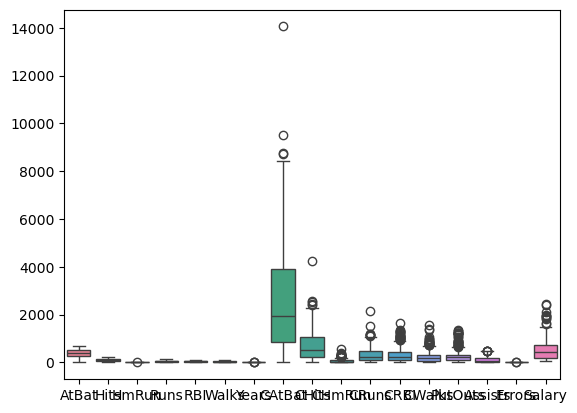

In [111]:
sns.boxplot(df)

In [112]:
def outlier_replace(df):
    for i in df:
        if df[i].dtype in ("float64","int64"):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            IQR = q3-q1
            ul = q3 + (1.5*IQR)
            ll = q1 - (1.5*IQR)
            df[i].clip(lower = ll, upper = ul, inplace = True) 
            
outlier_replace(df)

<Axes: >

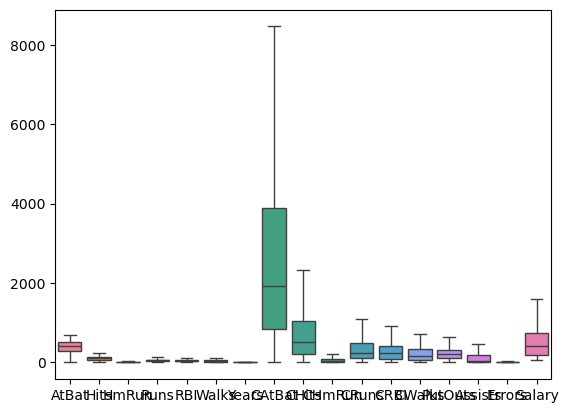

In [113]:
sns.boxplot(df)

# Q1

In [117]:
random_rows = df.sample(10)
print(random_rows)

     AtBat  Hits    HmRun  Runs  RBI  Walks  Years     CAtBat  CHits  \
249    279    69  4.00000    35   31     32      4 1359.00000    355   
5      185    37  1.00000    23    8     21      2  214.00000     42   
97     584   158 15.00000    70   84     42      5 2358.00000    636   
93     340    84 11.00000    62   33     47      5 1516.00000    376   
92     539   139  5.00000    93   58     69      5 1469.00000    369   
57     351    97  4.00000    55   29     39      4 1258.00000    353   
18     426   109  3.00000    55   43     62      1  426.00000    109   
218    522   163  9.00000    82   46     62     13 7037.00000   2019   
160    625   179  4.00000    94   60     65      5 1696.00000    476   
108    600   144 33.00000    85  117     65      2  696.00000    173   

       CHmRun      CRuns      CRBI    CWalks League Division  PutOuts  \
249  31.00000  180.00000 148.00000 158.00000      N        E      133   
5     1.00000   30.00000   9.00000  24.00000      N        E 

In [118]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000,263.00000
mean,403.64259,107.82890,11.61027,54.74525,51.48669,41.11407,7.28517,2630.14449,712.18631,62.68156,354.16730,311.61027,243.07224,253.34221,118.47529,8.57414,520.02526
std,147.30721,45.12533,8.72749,25.53982,25.88271,21.71806,4.71704,2187.27870,610.87807,62.57502,306.85849,274.66144,214.34154,179.45685,144.37234,6.54529,400.90914
min,19.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,19.00000,4.00000,0.00000,2.00000,3.00000,1.00000,0.00000,0.00000,0.00000,67.50000
25%,282.50000,71.50000,5.00000,33.50000,30.00000,23.00000,4.00000,842.50000,212.00000,15.00000,105.50000,95.00000,71.00000,113.50000,8.00000,3.00000,190.00000
50%,413.00000,103.00000,9.00000,52.00000,47.00000,37.00000,6.00000,1931.00000,516.00000,40.00000,250.00000,230.00000,174.00000,224.00000,45.00000,7.00000,425.00000
75%,526.00000,141.50000,18.00000,73.00000,71.00000,57.00000,10.00000,3890.50000,1054.00000,92.50000,497.50000,424.50000,328.50000,322.50000,192.00000,13.00000,750.00000
max,687.00000,238.00000,37.50000,130.00000,121.00000,105.00000,19.00000,8462.50000,2317.00000,208.75000,1085.50000,918.75000,714.75000,636.00000,468.00000,28.00000,1590.00000


In [119]:
df.shape

(263, 20)

In [122]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00000,0.96397,0.55561,0.89983,0.79602,0.62445,0.01770,0.22702,0.25055,0.23618,0.26778,0.24919,0.17746,0.29548,0.34176,0.32545,0.41962
Hits,0.96397,1.00000,0.53092,0.91063,0.78848,0.58731,0.02458,0.22832,0.26358,0.22169,0.27365,0.25291,0.17498,0.27490,0.30353,0.28043,0.45755
HmRun,0.55561,0.53092,1.00000,0.63098,0.84960,0.44054,0.12041,0.23911,0.24496,0.54038,0.28767,0.37211,0.25281,0.19523,-0.16227,-0.01013,0.36004
Runs,0.89983,0.91063,0.63098,1.00000,0.77869,0.69702,-0.00560,0.19430,0.22136,0.25157,0.27290,0.22885,0.20935,0.24712,0.17931,0.19333,0.44126
RBI,0.79602,0.78848,0.84960,0.77869,1.00000,0.56950,0.13560,0.29962,0.31894,0.48563,0.33877,0.41288,0.27302,0.24740,0.06224,0.15049,0.46017
Walks,0.62445,0.58731,0.44054,0.69702,0.56950,1.00000,0.13716,0.28275,0.29286,0.34335,0.35001,0.32824,0.44645,0.26614,0.10150,0.08540,0.46095
Years,0.01770,0.02458,0.12041,-0.00560,0.13560,0.13716,1.00000,0.91581,0.90021,0.75006,0.87691,0.87141,0.85073,-0.04000,-0.08434,-0.15614,0.43645
CAtBat,0.22702,0.22832,0.23911,0.19430,0.29962,0.28275,0.91581,1.00000,0.99550,0.84092,0.98167,0.96130,0.91841,0.02510,-0.00216,-0.06671,0.57179
CHits,0.25055,0.26358,0.24496,0.22136,0.31894,0.29286,0.90021,0.99550,1.00000,0.83872,0.98549,0.96163,0.91052,0.02785,-0.00637,-0.06487,0.59805
CHmRun,0.23618,0.22169,0.54038,0.25157,0.48563,0.34335,0.75006,0.84092,0.83872,1.00000,0.86159,0.93830,0.83088,0.08155,-0.19778,-0.16861,0.58694


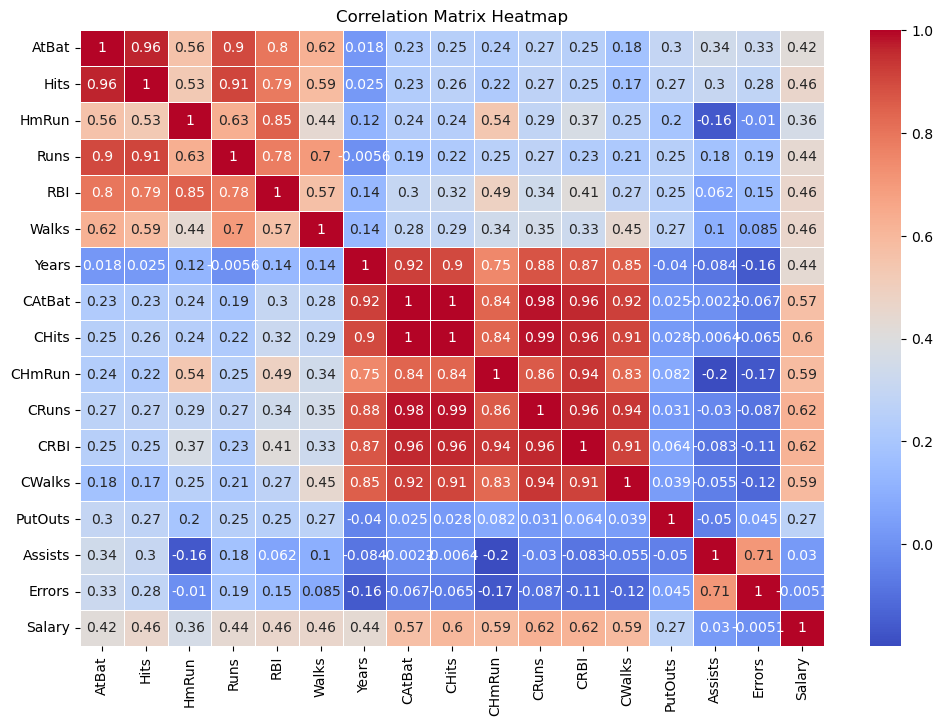

In [126]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [128]:
salary_correlation = correlation_matrix['Salary'].sort_values(ascending=False)
salary_correlation

Salary     1.00000
CRuns      0.62184
CRBI       0.61969
CHits      0.59805
CWalks     0.59179
CHmRun     0.58694
CAtBat     0.57179
Walks      0.46095
RBI        0.46017
Hits       0.45755
Runs       0.44126
Years      0.43645
AtBat      0.41962
HmRun      0.36004
PutOuts    0.26762
Assists    0.02955
Errors    -0.00505
Name: Salary, dtype: float64

In [129]:
df.isnull().sum()

AtBat                  0
Hits                   0
HmRun                  0
Runs                   0
RBI                    0
Walks                  0
Years                  0
CAtBat                 0
CHits                  0
CHmRun                 0
CRuns                  0
CRBI                   0
CWalks                 0
League                 0
Division               0
PutOuts                0
Assists                0
Errors                 0
Salary                 0
Selected_New_League    0
dtype: int64

In [134]:
num=df.select_dtypes(include=[np.number])
num.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,315,81,7.00000,24,38,39,14,3449.00000,835,69.00000,321.00000,414.00000,375.00000,632,43,10,475.00000
1,479,130,18.00000,66,72,76,3,1624.00000,457,63.00000,224.00000,266.00000,263.00000,636,82,14,480.00000
2,496,141,20.00000,65,78,37,11,5628.00000,1575,208.75000,828.00000,838.00000,354.00000,200,11,3,500.00000
3,321,87,10.00000,39,42,30,2,396.00000,101,12.00000,48.00000,46.00000,33.00000,636,40,4,91.50000
4,594,169,4.00000,74,51,35,11,4408.00000,1133,19.00000,501.00000,336.00000,194.00000,282,421,25,750.00000


In [136]:
cat=df.select_dtypes(include=['object'])
cat.head()

,League,Division,Selected_New_League
0,N,W,N
1,A,W,A
2,N,E,N
3,N,E,N
4,A,W,A


In [138]:
from sklearn.preprocessing import LabelEncoder

cat = cat.apply(LabelEncoder().fit_transform)
cat.head(3)

,League,Division,Selected_New_League
0,1,1,1
1,0,1,0
2,1,0,1


In [140]:
finalcombine=pd.concat([num,cat],axis=1)

In [142]:
norm = finalcombine.drop(['League','Division','Selected_New_League','Salary'], axis = 1)
non_norm = finalcombine[['League','Division','Selected_New_League','Salary']]

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_norm = scaler.fit_transform(norm)  

scaled_df = pd.DataFrame(scaled_norm)
scaled_df.columns = norm.columns

In [146]:
scaled_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.60290,-0.59568,-0.52925,-1.20611,-0.52206,-0.09753,1.42624,0.37509,0.20143,0.10117,-0.10829,0.37350,0.61668,2.11404,-0.52378,0.21826
1,0.51254,0.49226,0.73353,0.44151,0.79406,1.60937,-0.91018,-0.46088,-0.41853,0.00510,-0.42500,-0.16638,0.09315,2.13638,-0.25313,0.83055
2,0.62817,0.73649,0.96313,0.40229,1.02632,-0.18979,0.78904,1.37320,1.41511,2.33874,1.54708,1.92016,0.51851,-0.29781,-0.74585,-0.85325
3,-0.56209,-0.46246,-0.18486,-0.61767,-0.36722,-0.51272,-1.12258,-1.02337,-1.00241,-0.81148,-0.99965,-0.96889,-0.98195,2.13638,-0.54460,-0.70018
4,1.29471,1.35817,-0.87365,0.75535,-0.01884,-0.28206,0.78904,0.81437,0.69018,-0.69940,0.47942,0.08897,-0.22938,0.16000,2.09944,2.51435


In [148]:
combine = pd.concat([scaled_df,non_norm],axis=1)
combine.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,Selected_New_League,Salary
0,-0.60290,-0.59568,-0.52925,-1.20611,-0.52206,-0.09753,1.42624,0.37509,0.20143,0.10117,-0.10829,0.37350,0.61668,2.11404,-0.52378,0.21826,1,1,1,475.00000
1,0.51254,0.49226,0.73353,0.44151,0.79406,1.60937,-0.91018,-0.46088,-0.41853,0.00510,-0.42500,-0.16638,0.09315,2.13638,-0.25313,0.83055,0,1,0,480.00000
2,0.62817,0.73649,0.96313,0.40229,1.02632,-0.18979,0.78904,1.37320,1.41511,2.33874,1.54708,1.92016,0.51851,-0.29781,-0.74585,-0.85325,1,0,1,500.00000
3,-0.56209,-0.46246,-0.18486,-0.61767,-0.36722,-0.51272,-1.12258,-1.02337,-1.00241,-0.81148,-0.99965,-0.96889,-0.98195,2.13638,-0.54460,-0.70018,1,0,1,91.50000
4,1.29471,1.35817,-0.87365,0.75535,-0.01884,-0.28206,0.78904,0.81437,0.69018,-0.69940,0.47942,0.08897,-0.22938,0.16000,2.09944,2.51435,0,1,0,750.00000


In [150]:
X = combine.drop(['Salary'], axis=1)
Y = combine['Salary']

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , random_state=100)

print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (184, 19)
Test shape  -  (79, 19)


## Ridge (L2)

In [153]:
from sklearn.linear_model import Ridge

final_mod = Ridge(alpha=5)  

final_mod.fit(X_train, y_train)

Ridge(alpha=5)

In [155]:
print(final_mod.intercept_)

554.3681834793348


In [157]:
print(final_mod.coef_) 

[-149.08633606  188.24935478  -19.40370151   33.17269933   -7.81447687
   32.16056992  -77.61218464  -80.6664493   132.43486704   57.69472378
   91.60929243   68.28454022   25.81396257   62.15964542   23.88800104
  -16.8628236    26.75390441  -74.5140088   -34.98481673]


In [159]:
coefs = pd.DataFrame(list(final_mod.coef_.ravel()),list(final_mod.feature_names_in_)).reset_index()
coefs.columns = ['feature', 'coefficient']
coefs

,feature,coefficient
0,AtBat,-149.08634
1,Hits,188.24935
2,HmRun,-19.40370
3,Runs,33.17270
4,RBI,-7.81448
5,Walks,32.16057
6,Years,-77.61218
7,CAtBat,-80.66645
8,CHits,132.43487
9,CHmRun,57.69472


In [161]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,Selected_New_League,Salary
152,0.59416,0.73649,-0.07006,0.87304,-0.17368,-0.18979,1.63864,0.76077,0.86567,0.34134,0.85163,0.43186,0.45307,-0.08007,-0.76667,-1.00632,0,0,0,525.00000
25,0.74379,0.64768,0.96313,1.38302,1.68438,2.25523,1.42624,1.17761,1.09857,1.65426,1.33486,1.54079,2.20479,0.07625,-0.78749,-0.85325,0,1,0,900.00000
81,0.25409,0.44785,0.50394,0.59843,0.83277,1.79390,1.42624,1.85279,2.26797,2.33874,2.34376,2.21472,2.11247,-0.87286,0.69068,1.13670,0,1,0,1500.00000
188,-1.13342,-1.23956,-1.33285,-1.55917,-1.02529,-0.51272,2.48825,2.67157,2.63207,1.55819,2.38783,2.21472,2.20479,1.50550,-0.52378,-0.39403,1,1,1,750.00000
10,-1.37147,-1.21735,-0.87365,-0.93151,-0.98658,-0.65112,0.36423,-0.34544,-0.40213,-0.76344,-0.52948,-0.45820,-0.38363,0.28282,-0.50990,0.37133,1,1,1,512.50000


In [163]:
import numpy as np
train['fitted_value'] = np.round(final_mod.predict(X_train),2)
train['Residual'] = np.round(train.Salary - train.fitted_value,2)
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League,Division,Selected_New_League,Salary,fitted_value,Residual
152,0.59416,0.73649,-0.07006,0.87304,-0.17368,-0.18979,1.63864,0.76077,0.86567,0.34134,...,0.45307,-0.08007,-0.76667,-1.00632,0,0,0,525.00000,688.68000,-163.68000
25,0.74379,0.64768,0.96313,1.38302,1.68438,2.25523,1.42624,1.17761,1.09857,1.65426,...,2.20479,0.07625,-0.78749,-0.85325,0,1,0,900.00000,897.42000,2.58000
81,0.25409,0.44785,0.50394,0.59843,0.83277,1.79390,1.42624,1.85279,2.26797,2.33874,...,2.11247,-0.87286,0.69068,1.13670,0,1,0,1500.00000,1126.23000,373.77000
188,-1.13342,-1.23956,-1.33285,-1.55917,-1.02529,-0.51272,2.48825,2.67157,2.63207,1.55819,...,2.20479,1.50550,-0.52378,-0.39403,1,1,1,750.00000,917.38000,-167.38000
10,-1.37147,-1.21735,-0.87365,-0.93151,-0.98658,-0.65112,0.36423,-0.34544,-0.40213,-0.76344,...,-0.38363,0.28282,-0.50990,0.37133,1,1,1,512.50000,231.48000,281.02000


In [165]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Salary,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  54.0


In [167]:
combine.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,Selected_New_League,Salary
0,-0.60290,-0.59568,-0.52925,-1.20611,-0.52206,-0.09753,1.42624,0.37509,0.20143,0.10117,-0.10829,0.37350,0.61668,2.11404,-0.52378,0.21826,1,1,1,475.00000
1,0.51254,0.49226,0.73353,0.44151,0.79406,1.60937,-0.91018,-0.46088,-0.41853,0.00510,-0.42500,-0.16638,0.09315,2.13638,-0.25313,0.83055,0,1,0,480.00000
2,0.62817,0.73649,0.96313,0.40229,1.02632,-0.18979,0.78904,1.37320,1.41511,2.33874,1.54708,1.92016,0.51851,-0.29781,-0.74585,-0.85325,1,0,1,500.00000
3,-0.56209,-0.46246,-0.18486,-0.61767,-0.36722,-0.51272,-1.12258,-1.02337,-1.00241,-0.81148,-0.99965,-0.96889,-0.98195,2.13638,-0.54460,-0.70018,1,0,1,91.50000
4,1.29471,1.35817,-0.87365,0.75535,-0.01884,-0.28206,0.78904,0.81437,0.69018,-0.69940,0.47942,0.08897,-0.22938,0.16000,2.09944,2.51435,0,1,0,750.00000


## Lasso(L1)

In [218]:
from sklearn.linear_model import LassoCV
Lasso_mod = LassoCV()  
l1 = Lasso_mod.fit(X_train, y_train)

In [172]:
l1.alpha_  

1.1992073314941427

In [174]:
l1.intercept_ 

549.1856187779581

In [176]:
l1.coef_

array([-204.12959727,  231.07536951,   -4.32475196,   14.5599089 ,
         -8.43625012,   42.97965786,  -43.32805399, -574.16956305,
        642.53648073,   97.15602689,   81.33142272,    0.        ,
         23.85958368,   68.72123193,   34.32386434,  -12.19226518,
         25.01078584,  -64.98874609,  -35.93851036])

In [178]:
coef2 = pd.DataFrame(list(l1.coef_.ravel()),list(l1.feature_names_in_)).reset_index()
coef2.columns = ['Variable', 'coefficient']
coef2 = coef2.sort_values(by='coefficient', ascending=False)
coef2

,Variable,coefficient
8,CHits,642.53648
1,Hits,231.07537
9,CHmRun,97.15603
10,CRuns,81.33142
13,PutOuts,68.72123
5,Walks,42.97966
14,Assists,34.32386
16,League,25.01079
12,CWalks,23.85958
3,Runs,14.55991


In [180]:
import numpy as np
train['fitted_value'] = np.round(Lasso_mod.predict(X_train),2)
train['Residual'] = np.round(train.Salary - train.fitted_value,2)
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League,Division,Selected_New_League,Salary,fitted_value,Residual
152,0.59416,0.73649,-0.07006,0.87304,-0.17368,-0.18979,1.63864,0.76077,0.86567,0.34134,...,0.45307,-0.08007,-0.76667,-1.00632,0,0,0,525.00000,746.51000,-221.51000
25,0.74379,0.64768,0.96313,1.38302,1.68438,2.25523,1.42624,1.17761,1.09857,1.65426,...,2.20479,0.07625,-0.78749,-0.85325,0,1,0,900.00000,859.15000,40.85000
81,0.25409,0.44785,0.50394,0.59843,0.83277,1.79390,1.42624,1.85279,2.26797,2.33874,...,2.11247,-0.87286,0.69068,1.13670,0,1,0,1500.00000,1362.18000,137.82000
188,-1.13342,-1.23956,-1.33285,-1.55917,-1.02529,-0.51272,2.48825,2.67157,2.63207,1.55819,...,2.20479,1.50550,-0.52378,-0.39403,1,1,1,750.00000,925.82000,-175.82000
10,-1.37147,-1.21735,-0.87365,-0.93151,-0.98658,-0.65112,0.36423,-0.34544,-0.40213,-0.76344,...,-0.38363,0.28282,-0.50990,0.37133,1,1,1,512.50000,237.67000,274.83000


In [182]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Salary,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  56.99999999999999


In [184]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Salary'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  257.92


In [186]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

dt = DecisionTreeRegressor()  
dt.fit(X_train,y_train) 

DecisionTreeRegressor()

In [216]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
y_pred = dt.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.436
RMSE: 309.792


In [190]:
params = { 'min_samples_split': [350,200,250,100], 
           'min_samples_leaf': [120,50,100],
           'max_depth':[3,4,5]}

In [192]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              params,
                              verbose=1,
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [120, 50, 100],
                         'min_samples_split': [350, 200, 250, 100]},
             verbose=1)

In [193]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50, min_samples_split=100,
                      random_state=42)

In [214]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error', 
                                 min_samples_split=100,
                                 min_samples_leaf=50, 
                                 max_depth=3)

dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50, min_samples_split=100)

In [212]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
y_pred = dt.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.436
RMSE: 309.792


In [200]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestRegressor(random_state=20,
                               n_estimators=25, 
                               criterion="squared_error",
                               max_depth=4,  
                               min_samples_split=100,
                               min_samples_leaf=50,
                               max_features="sqrt")  

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                      min_samples_split=100, n_estimators=25, random_state=20)

In [210]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R²: 0.460
RMSE: 303.129


In [204]:
params = { 'min_samples_split': [350,200,250,100],  
           'min_samples_leaf': [120,50,100], 
           'max_depth':[3,4,5]}

In [206]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [120, 50, 100],
                         'min_samples_split': [350, 200, 250, 100]},
             verbose=1)

In [207]:
grid_search_cv.best_estimator_

RandomForestRegressor(max_depth=3, min_samples_leaf=50, min_samples_split=100,
                      random_state=42)